In [3]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

import json

from paths import *
from tools.vizu import remove_acentos
from tools.vizu import normalize_cols
from tools.io import read_sheets


from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')


# Import Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df['state'] = df['state'].str.replace('TOTAL','BRASIL')
df.to_csv('brasil_states.csv', index=False)
dd = df.copy()

In [5]:
dd = dd.drop(['country'],1)

## MYTABLE

In [6]:
from tools.io import read_sheets
df = read_sheets('covid19_estados')

In [7]:
ddf = pd.merge(dd , df, on=['date','state'], how='left')
ddf['confirmed'] = ddf['totalCases']
ddf['new_cases'] = ddf['newCases']
ddf = ddf.drop(['city','newCases','totalCases'],1)
df  = ddf.copy()

In [8]:
for col in ['confirmed','new_cases','deaths','new_deaths']:
    df[col] = pd.to_numeric(df[col])

In [9]:
df_states = df.sort_values(by=['date','confirmed'], ascending=False)
df_states['city'] = df_states['state']
df_states.head()

mask = (df_states['state']!='BRASIL') & (df_states['state']!='SP')
not_sp = df_states[mask].groupby(by=['date'], as_index=False).sum()

not_sp['state'] = 'EXCETO SP'
not_sp['city'] = 'EXCETO SP'
df_states = pd.concat([df_states,not_sp[df_states.columns]],axis=0)


In [10]:
df_states

,date,state,confirmed,new_cases,deaths,new_deaths,city
399,2020-03-26,BRASIL,2609,40,NaN,NaN,BRASIL
376,2020-03-26,SP,862,0,NaN,NaN,SP
377,2020-03-26,RJ,370,0,NaN,NaN,RJ
389,2020-03-26,CE,211,0,NaN,NaN,CE
379,2020-03-26,DF,195,0,NaN,NaN,DF
381,2020-03-26,RS,162,0,NaN,NaN,RS
373,2020-03-26,MG,153,20,NaN,NaN,MG
384,2020-03-26,SC,122,0,NaN,NaN,SC
372,2020-03-26,BA,104,13,NaN,NaN,BA
383,2020-03-26,PR,97,0,NaN,NaN,PR


In [32]:
from tools.vizu import brasil_vis2
df_states = br.sort_values(by=['date'],ascending=False)

escala  = 'lin'
largura = None
save    = True
#### CHOSE CITIES TO START SELECTED IN GRAPH
in_cities = ['BRASIL','SP', 'RJ']

# mask = ((dd[var_col]>0))
# dd = dd[mask]


var = 'confirmed'

## confirmed or deaths
fig = brasil_vis2(df_states, var,in_cities, escala, today='24/03/2020', save=False)

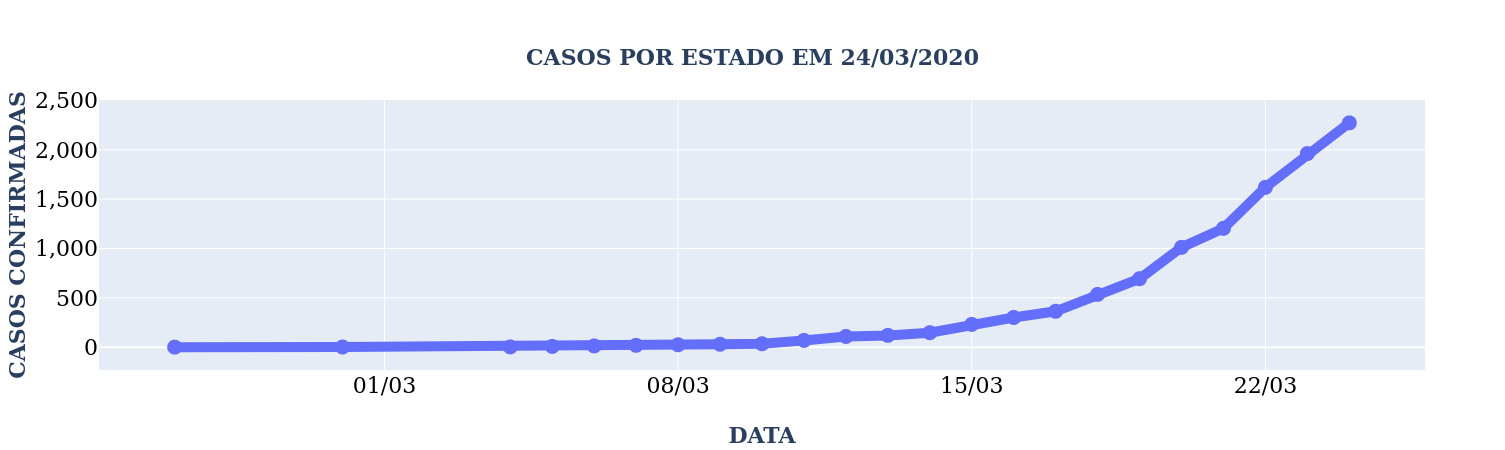

In [33]:
fig

In [ ]:
aa